In [1]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




In [16]:
print(__doc__)
# Code source: Jaques Grobler
# License: BSD 3 clause
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Load the diabetes dataset
# diabetes = datasets.load_diabetes()
df = pd.read_csv("hour.csv")

print(df.columns,df.shape)
df=df.drop(['dteday'],axis=1)

df_train, df_test = train_test_split(df, test_size=0.20, random_state = 23)
# df_trainA,df_test = train_test_split(df, test_size=0.20, random_state=42)
# df_train,df_val = train_test_split(df_trainA, test_size=0.20, random_state=42)

Automatically created module for IPython interactive environment
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') (17379, 17)


In [20]:
df_x_train = df_train['registered']
df_x_test = df_test['registered']

df_y_train = df_train['cnt']
df_y_test = df_test['cnt']
print(df_Y_train.shape,df_Y_test.shape,df_x_train.shape,df_x_test.shape)

(13903,) (3476,) (13903,) (3476,)


In [4]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(8,2,i)
        plt.plot(df[col],df["cnt"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

16


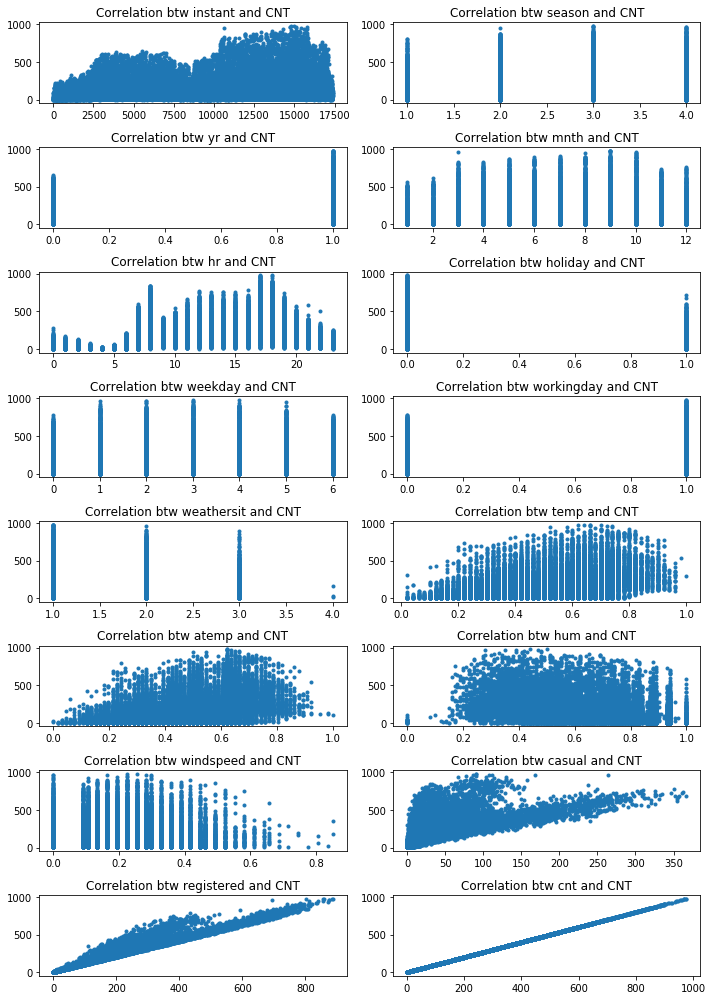

In [5]:
plotFeatures(df.columns,"Correlation btw %s and CNT")

In [21]:
predictor_train = df_train['registered']
df_x_train = np.column_stack((np.ones(len(predictor_train)),predictor_train))
predictor_test = df_test['registered']
df_x_test = np.column_stack((np.ones(len(predictor_test)),predictor_test))
print(df_x_test.shape, df_x_train.shape)

(3476, 2) (13903, 2)


In [22]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [25]:
print(df_x_train.shape, df_y_train.shape)

(13903, 2) (13903,)


In [26]:
# Train the model using the training sets
regr.fit(df_x_train, df_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# Make predictions using the testing set
df_y_pred = regr.predict(df_x_test)
print(df_y_pred.shape)

(3476,)


In [28]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error

Coefficients: 
 [0.         1.16330162]


In [30]:
print("Mean squared error: %.2f"
      % mean_squared_error(df_y_test, df_y_pred))

Mean squared error: 1813.03


In [32]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_y_test, df_y_pred))

Variance score: 0.95


In [31]:
print(df_x_test.shape, df_y_test.shape)


(3476, 2) (3476,)


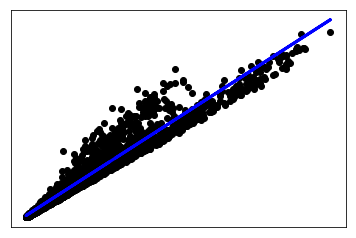

In [15]:
# Plot outputs
plt.scatter(df_x_test[:,1], df_Y_test,  color='black')
plt.plot(df_X_test[:,1], df_Y_pred, color='blue', linewidth=3)
# plt.plot(df_X_test, df_Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()